In [1]:
!pip install pgeocode


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pgeocode
nomi = pgeocode.Nominatim('IN')

In [7]:
cd=pd.read_excel('C:\\Users\\mohit\\Desktop\\Capstone\\Customer_Data.xlsx')
fiv=pd.read_csv('C:\\Users\\mohit\\Desktop\\Capstone\\Final_invoice.csv')
jtd=pd.read_csv('C:\\Users\\mohit\\Desktop\\Capstone\\JTD.csv')
pm=pd.read_excel('C:\\Users\\mohit\\Desktop\\Capstone\\Plant Master.xlsx')

In [8]:
(cd.head())


,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,1.0,Z001,NaN,NaN,NaN,NaN,NaT
1,32,2,1.0,Z005,NaN,NaN,NaN,NaN,NaT
2,34,4,1.0,Z005,NaN,2.0,NaN,NaN,NaT
3,35,5,1.0,Z005,NaN,NaN,NaN,NaN,NaT
4,42,7,1.0,Z008,NaN,NaN,NaN,NaN,NaT


In [9]:
(fiv.head())


,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,...,Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
0,0,0.0,0.0,MAJIWADA,0.0,0.0,0.0,0.0,Thane,NaN,...,NaN,0.0,RUPESH,4051.95,0.0,0.0,0.0,0.0,4051.95,BC01FS1
1,1,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,...,NaN,0.0,PRASHANT,1001.29,0.0,0.0,0.0,0.0,1001.29,BC01SA2
2,2,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE[W],NaN,...,NaN,0.0,IMRAN,233.14,0.0,0.0,0.0,0.0,233.14,BC01SA2
3,3,0.0,0.0,THNAE,0.0,0.0,0.0,0.0,THNAE,NaN,...,NaN,0.0,PRASHANT,0.00,0.0,0.0,0.0,0.0,0.00,BC01SA2
4,4,0.0,0.0,THANE,0.0,0.0,0.0,0.0,THANE,NaN,...,NaN,0.0,DAYANAND,2747.12,0.0,0.0,0.0,0.0,2747.12,BC01SA2


In [10]:
(jtd.head())


,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,0,22385,180,OSLCC_SRV31,NaN,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,1,23910,10,1DM279018170117,NaN,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,2,23910,40,1IS150203BE01,NaN,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,3,23910,60,1DM279001990173,NaN,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,4,23910,70,1DM88552790S001SA,NaN,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63


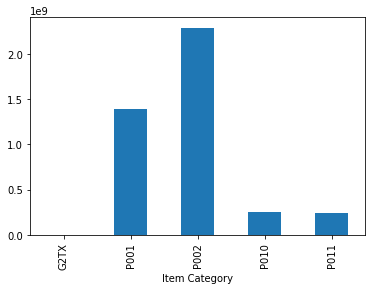

In [11]:
jtd.groupby('Item Category')['Net value'].sum().plot(kind='bar')

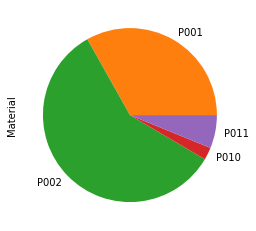

In [12]:
jtd.groupby(['Item Category'])['Material'].count().plot(kind='pie')

In [13]:
jtd.Material.value_counts()[0:10]

MARUTISUZUKI_SRV    292232
MISC_SRV07          270563
MAHINDRA_SRV        216327
HYUNDAI_SRV         146225
FFSOIL200901        115919
TATAMOTORS_SRV      115233
FFPRMFOL005         101740
ACCT_SRV             82562
FFPRMFLB002          57157
PAINT_SRV            52180
Name: Material, dtype: int64

In [14]:
(pm.head())

,Plant,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.0,600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,BC30,PLBC30,PLBC30,IN,NaN,"C-118, Phase 07,",160055.0,160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,X001,PLX001,NaN,IN,Thane,"Unit No.3, Kothari Compound,",400610.0,400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,X002,PLX002,NaN,IN,Ghaziabad,"18/1, C Site 4, Sahibabad",201010.0,201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,X003,PLX003,NaN,IN,Bengaluru,"#75, Sy.No. 83/2, Panathur Mai",560087.0,560087,Bengaluru,MFCB,Karnataka


In [15]:
print(cd.shape)
print(fiv.shape)
print(jtd.shape)
print(pm.shape)

(555338, 9)
(492314, 59)
(5619484, 10)
(438, 13)


In [16]:
fiv.tail()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,...,Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
492309,984736,NaN,NaN,.,NaN,NaN,NaN,NaN,Chennai,NaN,...,NaN,NaN,NaN,4458.15,NaN,NaN,NaN,NaN,NaN,X405SA1
492310,984737,NaN,NaN,.,NaN,NaN,NaN,NaN,ADAMBAKKAM,NaN,...,NaN,NaN,NaN,6832.08,NaN,NaN,NaN,NaN,NaN,X405SA1
492311,984738,NaN,NaN,CHENNAI,NaN,NaN,NaN,NaN,CHENNAI,NaN,...,NaN,NaN,NaN,9187.71,NaN,NaN,NaN,NaN,NaN,X405SA1
492312,984739,NaN,NaN,"DK NAGAR EXTN,",NaN,NaN,NaN,NaN,"Vijaya Nagar, 1 main road,Velacherr",NaN,...,NaN,NaN,NaN,11100.00,NaN,NaN,NaN,NaN,NaN,X405SA1
492313,984740,NaN,NaN,2ND FLOOR,NaN,NaN,NaN,NaN,saidapet,NaN,...,NaN,NaN,NaN,747.78,NaN,NaN,NaN,NaN,NaN,X405WM1


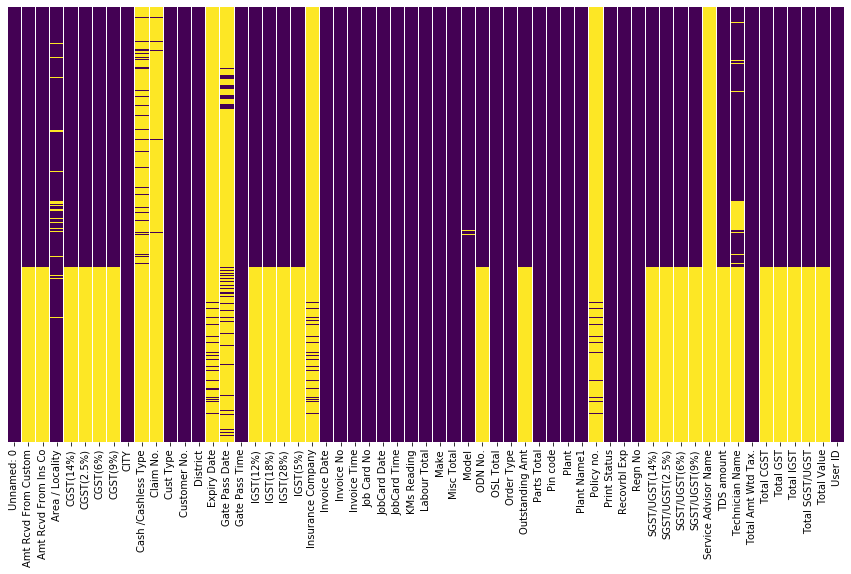

In [17]:
# fig,ax = plt.subplots(figsize = (16,8))
plt.figure(figsize=(15,8))
sns.heatmap(fiv.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [18]:
new_fiv=fiv.drop(['Total CGST','Total Value','Total SGST/UGST','Total GST','Total IGST',
           'Policy no.','SGST/UGST(14%)','SGST/UGST(2.5%)','SGST/UGST(6%)','SGST/UGST(9%)',
           'Outstanding Amt','Insurance Company','IGST(12%)','IGST(18%)','IGST(28%)',
           'IGST(5%)','CGST(14%)','CGST(2.5%)','CGST(6%)','CGST(9%)','Insurance Company',
           'Amt Rcvd From Custom','Amt Rcvd From Ins Co','Cash /Cashless Type','Claim No.','Gate Pass Date','Expiry Date'],axis=1)

In [19]:
new_fiv=new_fiv.drop(['Service Advisor Name','TDS amount','Technician Name','ODN No.'],axis=1)

In [20]:
new_fiv["actual_city"]=nomi.query_postal_code(np.array(new_fiv["Pin code"].astype(str))).county_name
new_fiv["actual_state"]=nomi.query_postal_code(np.array(new_fiv["Pin code"].astype(str))).state_name

In [21]:
new_fiv

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice Date,Invoice No,Invoice Time,...,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID,actual_city,actual_state
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,2015-01-02,7005200002,11:30:36,...,400601,BC01,THANE,NO,0.0,KA19MA1291,4051.95,BC01FS1,Thane,Maharashtra
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200003,10:07:32,...,400603,BC01,THANE,NO,0.0,MH43R3046,1001.29,BC01SA2,Thane,Maharashtra
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,2015-01-03,7005200004,11:12:57,...,400607,BC01,THANE,NO,0.0,AP09AX0582,233.14,BC01SA2,Thane,Maharashtra
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,2015-01-03,7005200005,11:40:44,...,400603,BC01,THANE,NO,0.0,MH43R3046,0.00,BC01SA2,Thane,Maharashtra
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,2015-01-03,7005200006,12:07:17,...,400603,BC01,THANE,NO,0.0,MH04CD9768,2747.12,BC01SA2,Thane,Maharashtra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492309,984736,.,Chennai,Retail,203820,Tamil Nadu,00:00:00,2016-06-30,7231000017,14:56:58,...,600058,X405,X405 - NANGAN MOTORS PVT. LTD.,NO,0.0,TN38Y9343,4458.15,X405SA1,Tiruvallur,Tamil Nadu
492310,984737,.,ADAMBAKKAM,Retail,170411,Tamil Nadu,00:00:00,2016-06-30,7231000018,15:06:52,...,600088,X405,X405 - NANGAN MOTORS PVT. LTD.,NO,0.0,TN22CK0396,6832.08,X405SA1,Kanchipuram,Tamil Nadu
492311,984738,CHENNAI,CHENNAI,Retail,48811,Tamil Nadu,00:00:00,2016-06-30,7231000019,15:43:56,...,600044,X405,X405 - NANGAN MOTORS PVT. LTD.,NO,0.0,TN07BA0211,9187.71,X405SA1,Kanchipuram,Tamil Nadu
492312,984739,"DK NAGAR EXTN,","Vijaya Nagar, 1 main road,Velacherr",Retail,204067,Tamil Nadu,00:00:00,2016-06-30,7231000020,15:58:59,...,600042,X405,X405 - NANGAN MOTORS PVT. LTD.,NO,0.0,TN07BV9290,11100.00,X405SA1,Chennai,Tamil Nadu


In [22]:
new_fiv.Model.value_counts()[0:25]

SWIFT           31899
ALTO            28569
SANTRO          24536
SCORPIO CRDE    23771
WAGONR          22864
I10             21892
INDICA          19810
SWIFT DZIRE     16004
BOLERO          15909
XYLO            13346
I20             12896
INNOVA          11470
CITY            10665
VISTA           10341
INDIGO          10337
800             10185
VERNA            8564
FIGO             7709
FIESTA           7667
LOGAN D          7353
SPARK            7270
RITZ             7075
BEAT             6881
OMNI             6415
ACCENT           5734
Name: Model, dtype: int64

In [23]:
new_fiv.groupby(['Model'])['KMs Reading'].count()

Model
207             92
3 SERIES        25
5 SERIES        66
500              8
6 SERIES         3
              ... 
YETI            82
Z4               1
ZEN           5137
ZEN ESTILO    4100
ZEST           336
Name: KMs Reading, Length: 245, dtype: int64

In [24]:
# pd.crosstab(new_fiv.Model,fiv['KMs Reading'])

In [25]:
# pd.pivot_table(new_fiv, index=['Make','Model'], aggfunc='mean')

In [26]:
new_fiv.Make.value_counts()

MARUTI SUZUKI           147102
MAHINDRA &  MAHINDRA     87356
HYUNDAI                  85342
TATA MOTORS              58034
GENERAL MOTORS           29092
FORD                     21616
TOYOTA                   19466
HONDA                    15464
SKODA                     6515
FIAT                      6437
VOLKSWAGEN                6150
RENAULT                   3429
NISSAN                    3090
MITSUBISHI MOTORS         1427
DAEWOO                     392
BMW                        257
MERCEDES BENZ              256
AUDI                       220
HINDUSTAN MOTORS           219
FORCE                      207
PREMIER AUTOMOBILES         93
SONALIKA                    87
LAND ROVER                  21
VOLVO                       19
SAN MOTORS                   8
JEEP                         7
PORCHE                       6
MORRIS                       2
Name: Make, dtype: int64

In [27]:
new_fiv.Make.unique()

array(['GENERAL MOTORS', 'TATA MOTORS', 'MARUTI SUZUKI', 'HYUNDAI',
       'TOYOTA', 'HONDA', 'FIAT', 'FORD', 'SKODA', 'MAHINDRA &  MAHINDRA',
       'VOLKSWAGEN', 'NISSAN', 'RENAULT', 'MERCEDES BENZ',
       'MITSUBISHI MOTORS', 'DAEWOO', 'BMW', 'FORCE', 'SONALIKA', 'VOLVO',
       'HINDUSTAN MOTORS', 'AUDI', 'PREMIER\xa0AUTOMOBILES', 'PORCHE',
       'LAND ROVER', 'JEEP', 'MORRIS', 'SAN MOTORS'], dtype=object)

In [29]:
for i in new_fiv.Make.unique():
  print(i)
  print(new_fiv[new_fiv.Make==i]['Total Amt Wtd Tax.'].describe())
  print("*******************************************")

GENERAL MOTORS
count     29092.000000
mean       4485.845745
std       12322.154870
min           0.000000
25%         307.020000
50%        1426.565000
75%        4211.540000
max      580852.260000
Name: Total Amt Wtd Tax., dtype: float64
*******************************************
TATA MOTORS
count     58034.000000
mean       4330.484952
std       11214.692794
min          -0.010000
25%         299.040000
50%        1277.255000
75%        4104.250000
max      523677.360000
Name: Total Amt Wtd Tax., dtype: float64
*******************************************
MARUTI SUZUKI
count    147102.000000
mean       3212.824547
std        7444.254217
min        -137.000000
25%         248.890000
50%        1135.595000
75%        3472.137500
max      323000.000000
Name: Total Amt Wtd Tax., dtype: float64
*******************************************
HYUNDAI
count     85342.000000
mean       3682.869860
std        8134.536007
min           0.000000
25%         288.400000
50%        1464.510000
75%   

In [30]:
new_fiv.describe()

,Unnamed: 0,Invoice No,Job Card No,KMs Reading,Labour Total,Misc Total,OSL Total,Parts Total,Pin code,Recovrbl Exp,Total Amt Wtd Tax.
count,492314.000000,4.923140e+05,492314.000000,4.923140e+05,492314.000000,492314.000000,492314.000000,492314.000000,492314.000000,492314.000000,492314.000000
mean,573273.930942,7.083830e+09,249405.285292,7.757703e+04,1353.650700,138.656038,466.071881,2436.605825,445353.237909,1.170507,4394.984443
std,313356.271183,8.181603e+07,143508.955173,1.168882e+05,3733.398162,1432.262070,2483.373346,7918.963281,166688.219868,65.138842,11080.901154
min,0.000000,7.000000e+09,4.000000,0.000000e+00,-137.000000,-0.010000,0.000000,-0.010000,0.000000,0.000000,-137.000000
25%,123078.250000,7.000125e+09,125625.250000,3.409625e+04,0.850000,0.000000,0.000000,0.000000,396195.000000,0.000000,299.040000
50%,681297.500000,7.035202e+09,249792.500000,6.007850e+04,537.990000,0.000000,0.000000,244.560000,440008.000000,0.000000,1452.820000
75%,804375.750000,7.160801e+09,373265.750000,9.376900e+04,1274.997500,49.750000,0.000000,2250.047500,600026.000000,0.000000,4409.917500
max,984740.000000,7.241600e+09,499962.000000,9.999999e+06,323000.000000,350000.000000,119444.190000,598003.480000,999999.000000,21000.260000,648203.490000


In [31]:
new_fiv.shape

(492314, 31)

In [32]:
for i in new_fiv.Make.unique():
  print(i)
  print(new_fiv[new_fiv.Make==i]['KMs Reading'].describe())
  print("*******************************************")

GENERAL MOTORS
count    2.909200e+04
mean     7.690489e+04
std      9.818644e+04
min      1.000000e+00
25%      3.254500e+04
50%      5.496100e+04
75%      9.017500e+04
max      4.569875e+06
Name: KMs Reading, dtype: float64
*******************************************
TATA MOTORS
count    5.803400e+04
mean     9.370149e+04
std      1.319778e+05
min      1.000000e+00
25%      4.377925e+04
50%      7.397650e+04
75%      1.128210e+05
max      7.158510e+06
Name: KMs Reading, dtype: float64
*******************************************
MARUTI SUZUKI
count    1.471020e+05
mean     6.748635e+04
std      1.259199e+05
min      1.000000e+00
25%      2.954400e+04
50%      5.201000e+04
75%      8.074875e+04
max      9.804400e+06
Name: KMs Reading, dtype: float64
*******************************************
HYUNDAI
count    8.534200e+04
mean     5.935458e+04
std      7.176274e+04
min      1.000000e+00
25%      2.813000e+04
50%      4.969950e+04
75%      7.613400e+04
max      6.064431e+06
Name: KMs Rea

In [33]:
new_fiv.actual_state.value_counts()[0:15]

Maharashtra         112927
Tamil Nadu          108901
Karnataka            40800
Telangana            30144
Uttar Pradesh        28513
Gujarat              21262
Punjab               18998
Andhra Pradesh       15791
Haryana              15209
Madhya Pradesh       12801
Rajasthan            12797
Kerala                5331
Delhi                 5129
Himachal Pradesh      2933
Bihar                 2887
Name: actual_state, dtype: int64

In [34]:
new_fiv['actual_city'].value_counts()

Pune           32777
Hyderabad      26136
Nashik         23734
Chennai        21614
Ghaziabad      18816
               ...  
Mahoba             1
Sitamarhi          1
Rajnandgaon        1
Hardoi             1
Sidhi              1
Name: actual_city, Length: 461, dtype: int64

In [35]:
jtd.head()

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,0,22385,180,OSLCC_SRV31,NaN,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,1,23910,10,1DM279018170117,NaN,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,2,23910,40,1IS150203BE01,NaN,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,3,23910,60,1DM279001990173,NaN,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,4,23910,70,1DM88552790S001SA,NaN,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63


In [36]:
jtd['Item Category'].value_counts()

P002    3250293
P001    1845451
P011     343288
P010     128823
G2TX      51629
Name: Item Category, dtype: int64

In [37]:
  for i in jtd['Item Category'].unique():
    print(i)
    print(jtd[jtd['Item Category']==i]['Net value'].describe())
    print("********************")
  

P010
count    128823.000000
mean       1947.452021
std        3158.750270
min           0.000000
25%         490.030000
50%         750.100000
75%        2019.460000
max       70000.310000
Name: Net value, dtype: float64
********************
P002
count    3.250293e+06
mean     7.044497e+02
std      1.799896e+03
min     -1.572816e+04
25%      4.979000e+01
50%      1.965000e+02
75%      7.982200e+02
max      5.998586e+05
Name: Net value, dtype: float64
********************
P011
count    343288.000000
mean        687.461683
std        2888.277458
min        -183.180000
25%         100.000000
50%         220.010000
75%         498.960000
max      350000.000000
Name: Net value, dtype: float64
********************
P001
count    1.845451e+06
mean     7.548125e+02
std      2.251537e+03
min     -4.799900e+02
25%      1.739800e+02
50%      3.443800e+02
75%      6.590800e+02
max      4.340000e+05
Name: Net value, dtype: float64
********************
G2TX
count    51629.0
mean         0.0
std      

In [38]:
# Just a Function for the above process


# def describe(df,new,j):
#     for i in df[new].unique():
#       print(i)
#       print(df[df[new]==i][j].describe())
#       print("********************")

In [39]:
# describe(jtd,'Item Category','Net value')

In [40]:
#  Total Net value of each item


for i in jtd['Item Category'].unique():
  print(i)
  print(jtd[jtd['Item Category']==i]['Net value'].sum())
  print('*************')

P010
250876611.73000002
*************
P002
2289667771.889999
*************
P011
235997346.39000002
*************
P001
1392969523.5699997
*************
G2TX
0.0
*************


In [41]:
new_fiv['Cust Type'].value_counts()

Retail              488995
Fleets                2218
Corporate others       579
Corporate- M&M         254
MFCWL                  252
Franchise               15
Insurance                1
Name: Cust Type, dtype: int64

In [42]:
jtd.isnull().sum()

Unnamed: 0                   0
DBM Order                    0
Order Item                   0
Material                 51629
Labor Value Number     3774033
Description              51629
Item Category                0
Order Quantity               0
Target quantity UoM      51629
Net value                    0
dtype: int64

In [43]:
jtd.drop_duplicates()

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,0,22385,180,OSLCC_SRV31,NaN,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,1,23910,10,1DM279018170117,NaN,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,2,23910,40,1IS150203BE01,NaN,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,3,23910,60,1DM279001990173,NaN,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,4,23910,70,1DM88552790S001SA,NaN,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63
...,...,...,...,...,...,...,...,...,...,...
5619479,5619479,962813,50,ACCT_SRV,ACCDBP0121,DENTING RADIATOR MOUNTING PANEL LOWER,P001,850.0,MIN,1050.00
5619480,5619480,962813,60,ACCT_SRV,ACCDBP0110,DENTING QUARTER PANEL RHS,P001,750.0,MIN,1250.00
5619481,5619481,962813,70,TOYOTA_SRV,TOINEL0029,CHARGING BATTERY & TESTING LOAD,P001,42.0,MIN,223.00
5619482,5619482,962813,80,ACCT_SRV,ACCDEL0093,REPAIR LHS / RHS TAIL LIGHT BOX,P001,450.0,MIN,450.00


In [44]:
jtd['DBM Order'].value_counts()

347525    462
947267    318
799599    308
528391    260
546465    256
         ... 
126109      1
713783      1
117913      1
689211      1
4094        1
Name: DBM Order, Length: 973473, dtype: int64

In [45]:
new_fiv['invoice_DateTime']=pd.to_datetime(new_fiv['Invoice Date']+' '+new_fiv['Invoice Time'])
new_fiv['JobCard_DateTime']=pd.to_datetime(new_fiv['JobCard Date']+' '+new_fiv['JobCard Time'])

new_fiv['Total_Service_Time']=new_fiv['invoice_DateTime']-new_fiv['JobCard_DateTime']

In [46]:
new_fiv.drop(['Invoice Date','Invoice Time','JobCard Date','JobCard Time'],1,inplace=True)


In [47]:
new_fiv.head()

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice No,Job Card No,KMs Reading,...,Print Status,Recovrbl Exp,Regn No,Total Amt Wtd Tax.,User ID,actual_city,actual_state,invoice_DateTime,JobCard_DateTime,Total_Service_Time
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,7005200002,168303,49317,...,NO,0.0,KA19MA1291,4051.95,BC01FS1,Thane,Maharashtra,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200003,173997,78584,...,NO,0.0,MH43R3046,1001.29,BC01SA2,Thane,Maharashtra,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,7005200004,173889,33985,...,NO,0.0,AP09AX0582,233.14,BC01SA2,Thane,Maharashtra,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200005,174158,78584,...,NO,0.0,MH43R3046,0.00,BC01SA2,Thane,Maharashtra,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,7005200006,173860,50057,...,NO,0.0,MH04CD9768,2747.12,BC01SA2,Thane,Maharashtra,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35


In [48]:
new_fiv["Year"]=new_fiv["invoice_DateTime"].dt.year
new_fiv["Date"]=new_fiv["invoice_DateTime"].dt.date
new_fiv["Month"]=new_fiv["invoice_DateTime"].dt.month

In [49]:
new_fiv

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice No,Job Card No,KMs Reading,...,Total Amt Wtd Tax.,User ID,actual_city,actual_state,invoice_DateTime,JobCard_DateTime,Total_Service_Time,Year,Date,Month
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,7005200002,168303,49317,...,4051.95,BC01FS1,Thane,Maharashtra,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,2015,2015-01-02,1
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200003,173997,78584,...,1001.29,BC01SA2,Thane,Maharashtra,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,2015,2015-01-03,1
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,7005200004,173889,33985,...,233.14,BC01SA2,Thane,Maharashtra,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13,2015,2015-01-03,1
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200005,174158,78584,...,0.00,BC01SA2,Thane,Maharashtra,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12,2015,2015-01-03,1
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,7005200006,173860,50057,...,2747.12,BC01SA2,Thane,Maharashtra,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35,2015,2015-01-03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492309,984736,.,Chennai,Retail,203820,Tamil Nadu,00:00:00,7231000017,400100,72546,...,4458.15,X405SA1,Tiruvallur,Tamil Nadu,2016-06-30 14:56:58,2016-06-30 09:15:12,0 days 05:41:46,2016,2016-06-30,6
492310,984737,.,ADAMBAKKAM,Retail,170411,Tamil Nadu,00:00:00,7231000018,400092,18968,...,6832.08,X405SA1,Kanchipuram,Tamil Nadu,2016-06-30 15:06:52,2016-06-30 08:42:15,0 days 06:24:37,2016,2016-06-30,6
492311,984738,CHENNAI,CHENNAI,Retail,48811,Tamil Nadu,00:00:00,7231000019,400082,177433,...,9187.71,X405SA1,Kanchipuram,Tamil Nadu,2016-06-30 15:43:56,2016-06-30 08:27:51,0 days 07:16:05,2016,2016-06-30,6
492312,984739,"DK NAGAR EXTN,","Vijaya Nagar, 1 main road,Velacherr",Retail,204067,Tamil Nadu,00:00:00,7231000020,400545,22932,...,11100.00,X405SA1,Chennai,Tamil Nadu,2016-06-30 15:58:59,2016-06-30 12:53:48,0 days 03:05:11,2016,2016-06-30,6


In [50]:
new_fiv.Year.value_counts()

2016    197286
2015    124719
2014     95617
2013     56057
2012     18635
Name: Year, dtype: int64

In [51]:
new_fiv['Service time(hrs)']=new_fiv['Total_Service_Time'].astype('timedelta64[h]')

In [52]:
new_fiv

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice No,Job Card No,KMs Reading,...,User ID,actual_city,actual_state,invoice_DateTime,JobCard_DateTime,Total_Service_Time,Year,Date,Month,Service time(hrs)
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,7005200002,168303,49317,...,BC01FS1,Thane,Maharashtra,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,2015,2015-01-02,1,477.0
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200003,173997,78584,...,BC01SA2,Thane,Maharashtra,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,2015,2015-01-03,1,19.0
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,7005200004,173889,33985,...,BC01SA2,Thane,Maharashtra,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13,2015,2015-01-03,1,23.0
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200005,174158,78584,...,BC01SA2,Thane,Maharashtra,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12,2015,2015-01-03,1,1.0
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,7005200006,173860,50057,...,BC01SA2,Thane,Maharashtra,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35,2015,2015-01-03,1,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492309,984736,.,Chennai,Retail,203820,Tamil Nadu,00:00:00,7231000017,400100,72546,...,X405SA1,Tiruvallur,Tamil Nadu,2016-06-30 14:56:58,2016-06-30 09:15:12,0 days 05:41:46,2016,2016-06-30,6,5.0
492310,984737,.,ADAMBAKKAM,Retail,170411,Tamil Nadu,00:00:00,7231000018,400092,18968,...,X405SA1,Kanchipuram,Tamil Nadu,2016-06-30 15:06:52,2016-06-30 08:42:15,0 days 06:24:37,2016,2016-06-30,6,6.0
492311,984738,CHENNAI,CHENNAI,Retail,48811,Tamil Nadu,00:00:00,7231000019,400082,177433,...,X405SA1,Kanchipuram,Tamil Nadu,2016-06-30 15:43:56,2016-06-30 08:27:51,0 days 07:16:05,2016,2016-06-30,6,7.0
492312,984739,"DK NAGAR EXTN,","Vijaya Nagar, 1 main road,Velacherr",Retail,204067,Tamil Nadu,00:00:00,7231000020,400545,22932,...,X405SA1,Chennai,Tamil Nadu,2016-06-30 15:58:59,2016-06-30 12:53:48,0 days 03:05:11,2016,2016-06-30,6,3.0


In [53]:
new_fiv[new_fiv['Service time(hrs)']<0]

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice No,Job Card No,KMs Reading,...,User ID,actual_city,actual_state,invoice_DateTime,JobCard_DateTime,Total_Service_Time,Year,Date,Month,Service time(hrs)
359015,794156,PUDUPAKKAM,CHENNAI,Retail,182085,Tamil Nadu,00:00:00,7167000988,363294,62001,...,X085SA1,Kanchipuram,Tamil Nadu,2016-05-02 15:12:11,2016-05-02 15:12:44,-1 days +23:59:27,2016,2016-05-02,5,-1.0


In [54]:
new_fiv['KMs Reading'].describe()

count    4.923140e+05
mean     7.757703e+04
std      1.168882e+05
min      0.000000e+00
25%      3.409625e+04
50%      6.007850e+04
75%      9.376900e+04
max      9.999999e+06
Name: KMs Reading, dtype: float64

In [55]:
new_fiv['KMs Reading'].quantile(0.33)

42235.0

In [56]:
new_fiv['KMs Reading'].quantile(0.66)

79718.58000000002

In [57]:
bins=[0,42235.0,79718.58000000002,999999]
labels=["Low","Medium","High"]
new_fiv["KM_range"]=pd.cut(new_fiv["KMs Reading"], bins=bins, labels=labels)

In [58]:
new_fiv

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice No,Job Card No,KMs Reading,...,actual_city,actual_state,invoice_DateTime,JobCard_DateTime,Total_Service_Time,Year,Date,Month,Service time(hrs),KM_range
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,7005200002,168303,49317,...,Thane,Maharashtra,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,2015,2015-01-02,1,477.0,Medium
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200003,173997,78584,...,Thane,Maharashtra,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,2015,2015-01-03,1,19.0,Medium
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,7005200004,173889,33985,...,Thane,Maharashtra,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13,2015,2015-01-03,1,23.0,Low
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200005,174158,78584,...,Thane,Maharashtra,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12,2015,2015-01-03,1,1.0,Medium
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,7005200006,173860,50057,...,Thane,Maharashtra,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35,2015,2015-01-03,1,25.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492309,984736,.,Chennai,Retail,203820,Tamil Nadu,00:00:00,7231000017,400100,72546,...,Tiruvallur,Tamil Nadu,2016-06-30 14:56:58,2016-06-30 09:15:12,0 days 05:41:46,2016,2016-06-30,6,5.0,Medium
492310,984737,.,ADAMBAKKAM,Retail,170411,Tamil Nadu,00:00:00,7231000018,400092,18968,...,Kanchipuram,Tamil Nadu,2016-06-30 15:06:52,2016-06-30 08:42:15,0 days 06:24:37,2016,2016-06-30,6,6.0,Low
492311,984738,CHENNAI,CHENNAI,Retail,48811,Tamil Nadu,00:00:00,7231000019,400082,177433,...,Kanchipuram,Tamil Nadu,2016-06-30 15:43:56,2016-06-30 08:27:51,0 days 07:16:05,2016,2016-06-30,6,7.0,High
492312,984739,"DK NAGAR EXTN,","Vijaya Nagar, 1 main road,Velacherr",Retail,204067,Tamil Nadu,00:00:00,7231000020,400545,22932,...,Chennai,Tamil Nadu,2016-06-30 15:58:59,2016-06-30 12:53:48,0 days 03:05:11,2016,2016-06-30,6,3.0,Low


In [59]:
new_fiv.isnull().sum()

Unnamed: 0                0
Area / Locality       23890
CITY                      1
Cust Type                 0
Customer No.              0
District                  0
Gate Pass Time            0
Invoice No                0
Job Card No               0
KMs Reading               0
Labour Total              0
Make                      0
Misc Total                0
Model                  1525
OSL Total                 0
Order Type                0
Parts Total               0
Pin code                  0
Plant                     0
Plant Name1               0
Print Status              0
Recovrbl Exp              0
Regn No                  16
Total Amt Wtd Tax.        0
User ID                   0
actual_city           47246
actual_state          47246
invoice_DateTime          0
JobCard_DateTime          0
Total_Service_Time        0
Year                      0
Date                      0
Month                     0
Service time(hrs)         0
KM_range               1028
dtype: int64

In [60]:
new_fiv.dropna(inplace=True)

In [61]:
new_fiv.isnull().sum()

Unnamed: 0            0
Area / Locality       0
CITY                  0
Cust Type             0
Customer No.          0
District              0
Gate Pass Time        0
Invoice No            0
Job Card No           0
KMs Reading           0
Labour Total          0
Make                  0
Misc Total            0
Model                 0
OSL Total             0
Order Type            0
Parts Total           0
Pin code              0
Plant                 0
Plant Name1           0
Print Status          0
Recovrbl Exp          0
Regn No               0
Total Amt Wtd Tax.    0
User ID               0
actual_city           0
actual_state          0
invoice_DateTime      0
JobCard_DateTime      0
Total_Service_Time    0
Year                  0
Date                  0
Month                 0
Service time(hrs)     0
KM_range              0
dtype: int64

In [64]:
new_fiv

,Unnamed: 0,Area / Locality,CITY,Cust Type,Customer No.,District,Gate Pass Time,Invoice No,Job Card No,KMs Reading,...,actual_city,actual_state,invoice_DateTime,JobCard_DateTime,Total_Service_Time,Year,Date,Month,Service time(hrs),KM_range
0,0,MAJIWADA,Thane,Retail,67849,Maharashtra,00:00:00,7005200002,168303,49317,...,Thane,Maharashtra,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53,2015,2015-01-02,1,477.0,Medium
1,1,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200003,173997,78584,...,Thane,Maharashtra,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14,2015,2015-01-03,1,19.0,Medium
2,2,THANE,THANE[W],Retail,81055,Maharashtra,00:00:00,7005200004,173889,33985,...,Thane,Maharashtra,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13,2015,2015-01-03,1,23.0,Low
3,3,THNAE,THNAE,Retail,84419,Maharashtra,00:00:00,7005200005,174158,78584,...,Thane,Maharashtra,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12,2015,2015-01-03,1,1.0,Medium
4,4,THANE,THANE,Retail,18980,Maharashtra,00:00:00,7005200006,173860,50057,...,Thane,Maharashtra,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35,2015,2015-01-03,1,25.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492309,984736,.,Chennai,Retail,203820,Tamil Nadu,00:00:00,7231000017,400100,72546,...,Tiruvallur,Tamil Nadu,2016-06-30 14:56:58,2016-06-30 09:15:12,0 days 05:41:46,2016,2016-06-30,6,5.0,Medium
492310,984737,.,ADAMBAKKAM,Retail,170411,Tamil Nadu,00:00:00,7231000018,400092,18968,...,Kanchipuram,Tamil Nadu,2016-06-30 15:06:52,2016-06-30 08:42:15,0 days 06:24:37,2016,2016-06-30,6,6.0,Low
492311,984738,CHENNAI,CHENNAI,Retail,48811,Tamil Nadu,00:00:00,7231000019,400082,177433,...,Kanchipuram,Tamil Nadu,2016-06-30 15:43:56,2016-06-30 08:27:51,0 days 07:16:05,2016,2016-06-30,6,7.0,High
492312,984739,"DK NAGAR EXTN,","Vijaya Nagar, 1 main road,Velacherr",Retail,204067,Tamil Nadu,00:00:00,7231000020,400545,22932,...,Chennai,Tamil Nadu,2016-06-30 15:58:59,2016-06-30 12:53:48,0 days 03:05:11,2016,2016-06-30,6,3.0,Low


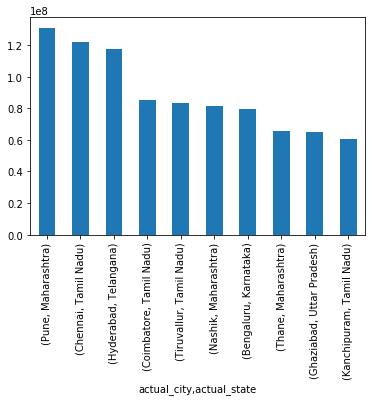

In [65]:
new_fiv.groupby(["actual_city",'actual_state'])['Total Amt Wtd Tax.'].sum().sort_values(ascending=False)[0:10].plot(kind='bar')

In [66]:
new_fiv.groupby(["actual_city",'actual_state'])['Service time(hrs)'].sum().sort_values(ascending=False)[0:10]

actual_city  actual_state
Pune         Maharashtra     2687982.0
Bengaluru    Karnataka       1978078.0
Chennai      Tamil Nadu      1576199.0
Nashik       Maharashtra     1507350.0
Hyderabad    Telangana       1407129.0
Tiruvallur   Tamil Nadu      1191830.0
Udaipur      Rajasthan       1078432.0
Coimbatore   Tamil Nadu       966680.0
Aurangabad   Maharashtra      959593.0
Thane        Maharashtra      932486.0
Name: Service time(hrs), dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

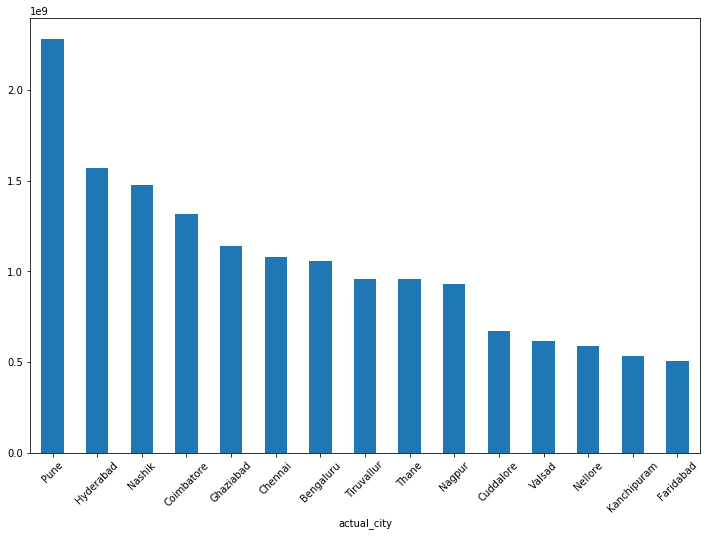

In [67]:
new_fiv.groupby(["actual_city"])['KMs Reading'].sum().sort_values(ascending=False)[0:15].plot(kind='bar',figsize=(12,8))
plt.xticks(rotation = 45)

In [68]:
new_fiv.groupby(['Make','KM_range'])['KM_range'].value_counts()

Make        KM_range  KM_range
AUDI        Low       Low           79
            Medium    Medium        74
            High      High          38
BMW         Low       Low           94
            Medium    Medium        91
                                  ... 
VOLKSWAGEN  Medium    Medium      1809
            High      High        1141
VOLVO       Low       Low           12
            Medium    Medium         4
            High      High           1
Name: KM_range, Length: 81, dtype: int64

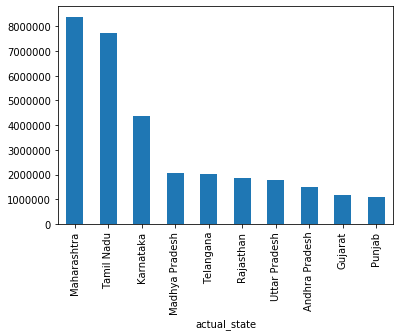

In [69]:
new_fiv.groupby(['actual_state'])['Service time(hrs)'].sum().sort_values(ascending=False)[0:10].plot(kind='bar')

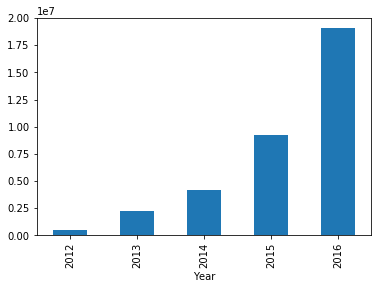

In [70]:
new_fiv.groupby(['Year'])['Service time(hrs)'].sum().plot(kind='bar')

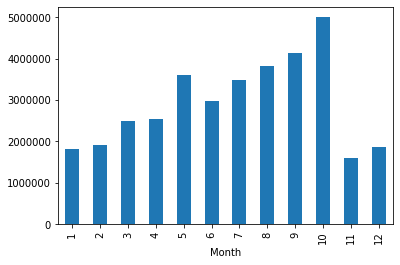

In [71]:
new_fiv.groupby(['Month'])['Service time(hrs)'].sum().plot(kind='bar')

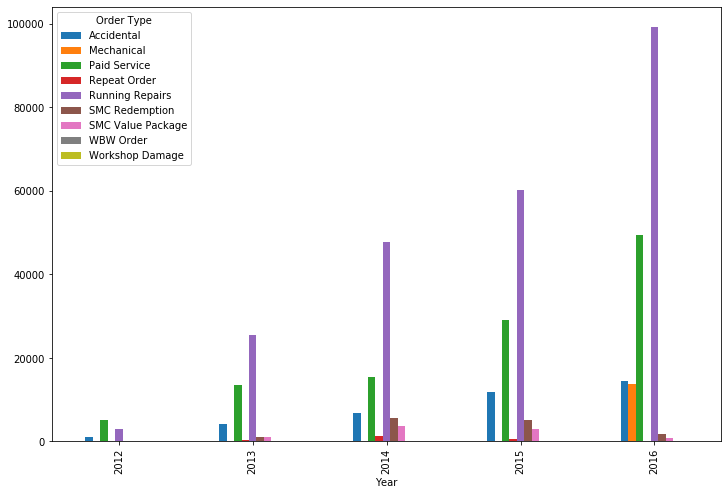

In [72]:
new_fiv.groupby(['Year','Order Type'])['Order Type'].count().unstack().plot(kind='bar',figsize=(12,8))

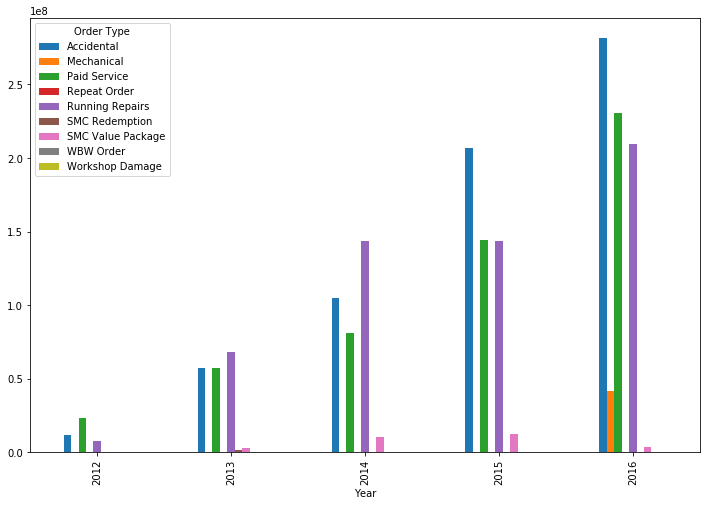

In [73]:
new_fiv.groupby(['Year','Order Type'])['Total Amt Wtd Tax.'].sum().unstack().plot(kind='bar',figsize=(12,8))

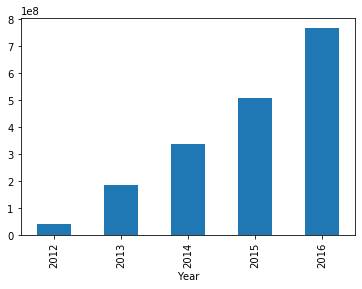

In [74]:
new_fiv.groupby(['Year'])['Total Amt Wtd Tax.'].sum().plot(kind='bar')

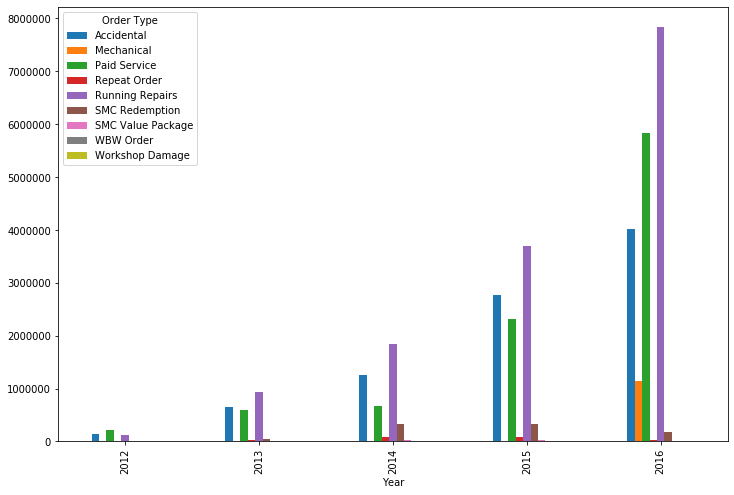

In [75]:
new_fiv.groupby(['Year','Order Type'])['Service time(hrs)'].sum().unstack().plot(kind='bar',figsize=(12,8))

In [76]:
clustering = new_fiv[['Cust Type','Make','Model','actual_city','Total Amt Wtd Tax.','Service time(hrs)']]

In [77]:
clustering

,Cust Type,Make,Model,actual_city,Total Amt Wtd Tax.,Service time(hrs)
0,Retail,GENERAL MOTORS,SPARK,Thane,4051.95,477.0
1,Retail,TATA MOTORS,INDICA,Thane,1001.29,19.0
2,Retail,MARUTI SUZUKI,ZEN,Thane,233.14,23.0
3,Retail,TATA MOTORS,INDICA,Thane,0.00,1.0
4,Retail,HYUNDAI,SANTRO XING,Thane,2747.12,25.0
...,...,...,...,...,...,...
492309,Retail,MARUTI SUZUKI,ALTO,Tiruvallur,4458.15,5.0
492310,Retail,NISSAN,MICRA,Kanchipuram,6832.08,6.0
492311,Retail,MAHINDRA & MAHINDRA,SCORPIO CRDE,Kanchipuram,9187.71,7.0
492312,Retail,HONDA,AMAZE,Chennai,11100.00,3.0


In [78]:
df1=new_fiv[['Total Amt Wtd Tax.','Make','Cust Type','Service time(hrs)']]


In [79]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [80]:
df1["Make"]=le.fit_transform(df1["Make"])
df1["Cust Type"]=le.fit_transform(df1["Cust Type"])

C:\Users\mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [81]:
df1

,Total Amt Wtd Tax.,Make,Cust Type,Service time(hrs)
0,4051.95,6,5,477.0
1,1001.29,24,5,19.0
2,233.14,13,5,23.0
3,0.00,24,5,1.0
4,2747.12,9,5,25.0
...,...,...,...,...
492309,4458.15,13,5,5.0
492310,6832.08,17,5,6.0
492311,9187.71,12,5,7.0
492312,11100.00,8,5,3.0


In [82]:
from sklearn.cluster import KMeans

clf_final=KMeans(n_clusters=6,random_state=42,init='k-means++')
clf_final.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [83]:
y_means=clf_final.predict(df1)

In [84]:
df1["Clusters"]=clf_final.predict(df1)

C:\Users\mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [85]:
df1

,Total Amt Wtd Tax.,Make,Cust Type,Service time(hrs),Clusters
0,4051.95,6,5,477.0,2
1,1001.29,24,5,19.0,2
2,233.14,13,5,23.0,2
3,0.00,24,5,1.0,2
4,2747.12,9,5,25.0,2
...,...,...,...,...,...
492309,4458.15,13,5,5.0,2
492310,6832.08,17,5,6.0,0
492311,9187.71,12,5,7.0,0
492312,11100.00,8,5,3.0,0


No handles with labels found to put in legend.


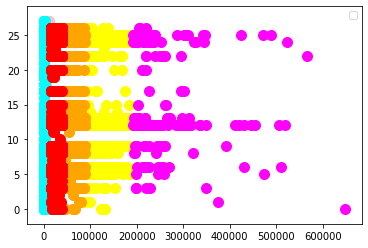

In [86]:
df2=np.array(df1)





plt.scatter(df2[y_means == 0, 0], df2[y_means == 0, 1], s = 100, c = 'pink')
plt.scatter(df2[y_means == 1, 0], df2[y_means == 1, 1], s = 100, c = 'yellow')
plt.scatter(df2[y_means == 2, 0], df2[y_means == 2, 1], s = 100, c = 'cyan')
plt.scatter(df2[y_means == 3, 0], df2[y_means == 3, 1], s = 100, c = 'magenta')
plt.scatter(df2[y_means == 4, 0], df2[y_means == 4, 1], s = 100, c = 'orange')
plt.scatter(df2[y_means == 5, 0], df2[y_means == 5, 1], s = 100, c = 'red')
# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.legend()

In [87]:
newww = df1.groupby(['Clusters']).agg({("Total Amt Wtd Tax.","mean"),('KMs Reading','mean'),("Make","count")}).sort_values(by='Clusters')

In [88]:
newww

Total Amt Wtd Tax.                                   Make          \
                KMs Reading    Make Total Amt Wtd Tax. KMs Reading    Make   
Clusters                                                                     
0               8658.564852   71546        8658.564852   13.073994   71546   
1             121584.255156     995      121584.255156   14.269347     995   
2               1271.077936  331006        1271.077936   13.191471  331006   
3             262016.069786     187      262016.069786   14.374332     187   
4              56563.177516    3857       56563.177516   13.929738    3857   
5              24103.828852   17220       24103.828852   13.339895   17220   

                              Cust Type                             \
         Total Amt Wtd Tax. KMs Reading    Make Total Amt Wtd Tax.   
Clusters                                                             
0                 13.073994    4.998239   71546           4.998239   
1                 14.269347    5.000000     995           5.000000   
2                 13.191471    4.999172  331006           4.999172   
3                 14.374332    5.000000     187           5.000000   
4                 13.929738    5.000000    3857           5.000000   
5                 13.339895    4.998142   17220           4.998142   

         Service time(hrs)                             
               KMs Reading    Make Total Amt Wtd Tax.  
Clusters                                               
0               123.596358   71546         123.596358  
1               940.336683     995         940.336683  
2                56.670369  331006          56.670369  
3              1449.834225     187        1449.834225  
4               520.983407    3857         520.983407  
5               256.410395   17220         256.410395

In [89]:
new_fiv.groupby(['actual_state']).sum().sort_values(by='Total Amt Wtd Tax.',ascending=False)[-20:]

,Unnamed: 0,Invoice No,Job Card No,KMs Reading,Labour Total,Misc Total,OSL Total,Parts Total,Pin code,Recovrbl Exp,Total Amt Wtd Tax.,Year,Month,Service time(hrs)
actual_state,,,,,,,,,,,,,,
Madhya Pradesh,9916329004,91711716836444,5004780530,885740884,23094884.27,118908.99,380885.32,33103318.72,5927804593,0.00,56697997.30,25767338,86468,2080570.0
Haryana,8160165173,106636532909316,3509547195,1020195775,13908057.01,2818187.61,5438592.05,34228149.37,1882537596,1100.00,56392986.04,30421610,100290,971085.0
Rajasthan,10764622901,91650378686711,5280766662,1014876708,11353831.26,4398885.20,280728.35,29720889.88,4066410850,0.00,45754334.69,25721933,91170,1847230.0
Delhi,2246397114,35925492369357,963479402,338656145,6845727.13,746168.92,3968865.05,20047491.19,562757236,2300.10,31608252.29,10300367,32358,531450.0
Kerala,3247908036,36766683872532,1157075906,374358900,13795206.94,286594.55,1385291.20,9871229.85,3545117749,0.00,25338322.54,10472242,35799,382252.0
Bihar,2469398671,20671374171237,1230952846,212687325,5508571.09,25947.45,68020.69,7733265.83,2349915825,0.00,13335805.06,5804017,22068,335927.0
Uttarakhand,2102836202,17881145416352,1061483711,168308487,1944434.49,925990.16,73546.96,5352103.92,640828986,499.99,8296075.53,5009698,19165,187914.0
Himachal Pradesh,2167239490,20949068830011,1139586360,194810793,3075878.16,207363.00,208352.93,4249579.90,509505058,0.00,7741173.99,5892328,21053,234556.0
Pondicherry,803447748,12343249605520,529374473,162733604,1776568.57,875074.42,326358.90,4710694.08,1045804091,0.00,7688695.97,3482662,11230,121421.0


In [90]:
new_fiv.groupby(['actual_state']).sum().sort_values(by='Total Amt Wtd Tax.',ascending=False)[0:20]

,Unnamed: 0,Invoice No,Job Card No,KMs Reading,Labour Total,Misc Total,OSL Total,Parts Total,Pin code,Recovrbl Exp,Total Amt Wtd Tax.,Year,Month,Service time(hrs)
actual_state,,,,,,,,,,,,,,
Tamil Nadu,55398867349,725303598374165,27845973582,7866250684,1.780306e+08,8653803.99,53531453.71,2.833418e+08,62989554672,251711.23,5.235577e+08,205531453,673299,7718524.0
Maharashtra,56383515354,743099740858625,23332496453,7548433625,1.271824e+08,7302717.82,57761055.00,2.265856e+08,43797073393,109512.62,4.188317e+08,212055113,686996,8387964.0
Karnataka,25107076622,279019525674842,11993564434,2875425015,4.176571e+07,18979049.39,13971669.30,7.492039e+07,22261749623,29749.99,1.496368e+08,79024470,261152,4365673.0
Telangana,15917605535,192477267070751,4964920158,1943547788,3.586892e+07,3301207.62,17736304.61,8.263540e+07,13685447907,44750.10,1.395418e+08,55046690,181351,2005204.0
Uttar Pradesh,15192415798,200440589248170,6283214379,1769948996,3.018385e+07,2320836.58,7579218.19,5.530629e+07,6046376670,17549.96,9.539020e+07,57251812,188264,1772438.0
Punjab,8500073495,132055007454597,4709467889,1357029072,2.402971e+07,2718283.21,9084642.22,4.949619e+07,2730356924,7740.05,8.532882e+07,37600389,120510,1076110.0
Gujarat,12068318783,147561381295043,4356021177,1330411936,2.182565e+07,1717909.43,12261334.20,4.579139e+07,8243960937,1000.00,8.159629e+07,42112573,146125,1169387.0
Andhra Pradesh,8977271459,111402895217927,4146933525,1344852249,2.596041e+07,1664379.07,6059700.67,3.897949e+07,8213833025,10799.85,7.266398e+07,31651804,103999,1495458.0
Madhya Pradesh,9916329004,91711716836444,5004780530,885740884,2.309488e+07,118908.99,380885.32,3.310332e+07,5927804593,0.00,5.669800e+07,25767338,86468,2080570.0


In [91]:
ltv_df=new_fiv[['Customer No.','Cust Type','actual_state','KM_range','Invoice No','Make','Model','Total Amt Wtd Tax.','Year']]

ltv_df.Year.value_counts()

2016    179653
2015    109721
2014     80569
2013     45676
2012      9192
Name: Year, dtype: int64

In [92]:
ltv_df=ltv_df[(ltv_df['Year']==2015)|(ltv_df['Year']==2016)]

ltv_df


,Customer No.,Cust Type,actual_state,KM_range,Invoice No,Make,Model,Total Amt Wtd Tax.,Year
0,67849,Retail,Maharashtra,Medium,7005200002,GENERAL MOTORS,SPARK,4051.95,2015
1,84419,Retail,Maharashtra,Medium,7005200003,TATA MOTORS,INDICA,1001.29,2015
2,81055,Retail,Maharashtra,Low,7005200004,MARUTI SUZUKI,ZEN,233.14,2015
3,84419,Retail,Maharashtra,Medium,7005200005,TATA MOTORS,INDICA,0.00,2015
4,18980,Retail,Maharashtra,Medium,7005200006,HYUNDAI,SANTRO XING,2747.12,2015
...,...,...,...,...,...,...,...,...,...
492309,203820,Retail,Tamil Nadu,Medium,7231000017,MARUTI SUZUKI,ALTO,4458.15,2016
492310,170411,Retail,Tamil Nadu,Low,7231000018,NISSAN,MICRA,6832.08,2016
492311,48811,Retail,Tamil Nadu,High,7231000019,MAHINDRA & MAHINDRA,SCORPIO CRDE,9187.71,2016
492312,204067,Retail,Tamil Nadu,Low,7231000020,HONDA,AMAZE,11100.00,2016


In [93]:
#Groupby of data
ltv_df=ltv_df.groupby(['Customer No.','Cust Type','actual_state','Make','Model']).agg({'Invoice No':'nunique','Total Amt Wtd Tax.':'mean'}).reset_index()
#cltv_group.drop('year',1,inplace=True)
ltv_df

,Customer No.,Cust Type,actual_state,Make,Model,Invoice No,Total Amt Wtd Tax.
0,10000,Retail,Telangana,MARUTI SUZUKI,WAGONR,1,185.96
1,100000,Retail,Gujarat,HYUNDAI,ACCENT,1,6026.05
2,100001,Retail,Maharashtra,MAHINDRA & MAHINDRA,BOLERO,1,697.59
3,100001,Retail,Maharashtra,SKODA,SUPERB,1,1058.44
4,100001,Retail,Maharashtra,TOYOTA,INNOVA,1,2507.72
...,...,...,...,...,...,...,...
173322,PLX109,Franchise,Tamil Nadu,TATA MOTORS,INDIGO,1,2217.30
173323,PLX109,Retail,Tamil Nadu,TATA MOTORS,INDICA,1,842.93
173324,PLX241,Franchise,Uttarakhand,MARUTI SUZUKI,RITZ,1,3477.37
173325,PLX277,Retail,West Bengal,TATA MOTORS,SUMO,1,6870.95


In [94]:
ltv_df['customer_value']=ltv_df['Invoice No']*ltv_df['Total Amt Wtd Tax.']

ltv_df

,Customer No.,Cust Type,actual_state,Make,Model,Invoice No,Total Amt Wtd Tax.,customer_value
0,10000,Retail,Telangana,MARUTI SUZUKI,WAGONR,1,185.96,185.96
1,100000,Retail,Gujarat,HYUNDAI,ACCENT,1,6026.05,6026.05
2,100001,Retail,Maharashtra,MAHINDRA & MAHINDRA,BOLERO,1,697.59,697.59
3,100001,Retail,Maharashtra,SKODA,SUPERB,1,1058.44,1058.44
4,100001,Retail,Maharashtra,TOYOTA,INNOVA,1,2507.72,2507.72
...,...,...,...,...,...,...,...,...
173322,PLX109,Franchise,Tamil Nadu,TATA MOTORS,INDIGO,1,2217.30,2217.30
173323,PLX109,Retail,Tamil Nadu,TATA MOTORS,INDICA,1,842.93,842.93
173324,PLX241,Franchise,Uttarakhand,MARUTI SUZUKI,RITZ,1,3477.37,3477.37
173325,PLX277,Retail,West Bengal,TATA MOTORS,SUMO,1,6870.95,6870.95


In [95]:
negative_value=ltv_df[ltv_df['customer_value']<0].index
ltv_df.drop(negative_value,0,inplace=True)
ltv_df


,Customer No.,Cust Type,actual_state,Make,Model,Invoice No,Total Amt Wtd Tax.,customer_value
0,10000,Retail,Telangana,MARUTI SUZUKI,WAGONR,1,185.96,185.96
1,100000,Retail,Gujarat,HYUNDAI,ACCENT,1,6026.05,6026.05
2,100001,Retail,Maharashtra,MAHINDRA & MAHINDRA,BOLERO,1,697.59,697.59
3,100001,Retail,Maharashtra,SKODA,SUPERB,1,1058.44,1058.44
4,100001,Retail,Maharashtra,TOYOTA,INNOVA,1,2507.72,2507.72
...,...,...,...,...,...,...,...,...
173322,PLX109,Franchise,Tamil Nadu,TATA MOTORS,INDIGO,1,2217.30,2217.30
173323,PLX109,Retail,Tamil Nadu,TATA MOTORS,INDICA,1,842.93,842.93
173324,PLX241,Franchise,Uttarakhand,MARUTI SUZUKI,RITZ,1,3477.37,3477.37
173325,PLX277,Retail,West Bengal,TATA MOTORS,SUMO,1,6870.95,6870.95


In [96]:
final_df=ltv_df[['Cust Type','actual_state','Make','Invoice No','Total Amt Wtd Tax.','customer_value']]

final_df

,Cust Type,actual_state,Make,Invoice No,Total Amt Wtd Tax.,customer_value
0,Retail,Telangana,MARUTI SUZUKI,1,185.96,185.96
1,Retail,Gujarat,HYUNDAI,1,6026.05,6026.05
2,Retail,Maharashtra,MAHINDRA & MAHINDRA,1,697.59,697.59
3,Retail,Maharashtra,SKODA,1,1058.44,1058.44
4,Retail,Maharashtra,TOYOTA,1,2507.72,2507.72
...,...,...,...,...,...,...
173322,Franchise,Tamil Nadu,TATA MOTORS,1,2217.30,2217.30
173323,Retail,Tamil Nadu,TATA MOTORS,1,842.93,842.93
173324,Franchise,Uttarakhand,MARUTI SUZUKI,1,3477.37,3477.37
173325,Retail,West Bengal,TATA MOTORS,1,6870.95,6870.95


In [97]:
final_df=pd.get_dummies(data=final_df,columns=['Cust Type','actual_state','Make'])

final_df

,Invoice No,Total Amt Wtd Tax.,customer_value,Cust Type_Corporate others,Cust Type_Corporate- M&M,Cust Type_Franchise,Cust Type_MFCWL,Cust Type_Retail,actual_state_Andhra Pradesh,actual_state_Arunachal Pradesh,...,Make_PORCHE,Make_PREMIER AUTOMOBILES,Make_RENAULT,Make_SAN MOTORS,Make_SKODA,Make_SONALIKA,Make_TATA MOTORS,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO
0,1,185.96,185.96,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,6026.05,6026.05,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,697.59,697.59,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1058.44,1058.44,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,2507.72,2507.72,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173322,1,2217.30,2217.30,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
173323,1,842.93,842.93,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
173324,1,3477.37,3477.37,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173325,1,6870.95,6870.95,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [99]:
X=final_df.drop('customer_value',axis=1)
y=final_df['customer_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

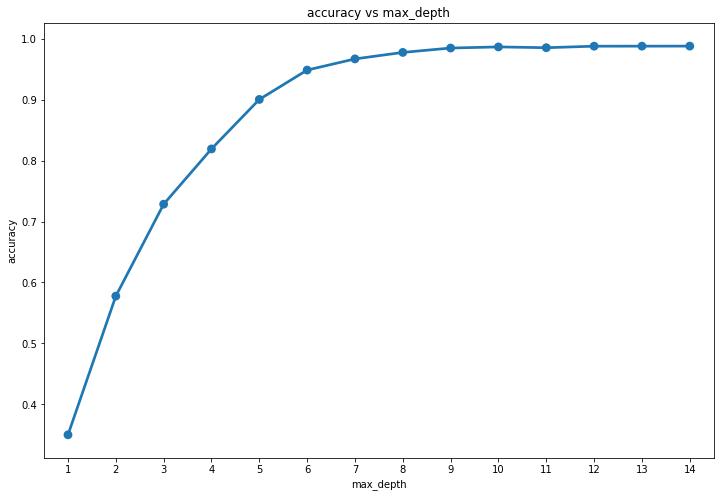

rmse score of dtr is  2768.370997637203
r2_score of dtr is 0.9784913899930846
rmse score of rfr is  1583.6626146659896
r2_score of rfr is 0.9919504844052831
rmse score of dtr is  9846.372517740967
r2_score of dtr is 0.7109656668191853


In [108]:
ltv_df=new_fiv[['Customer No.','Cust Type','actual_state','KM_range','Invoice No','Make','Model','Total Amt Wtd Tax.','Year']]

ltv_df.Year.value_counts()

ltv_df=ltv_df[(ltv_df['Year']==2015)|(ltv_df['Year']==2016)]

ltv_df

#Groupby of data
ltv_df=ltv_df.groupby(['Customer No.','Cust Type','actual_state','Make','Model']).agg({'Invoice No':'nunique','Total Amt Wtd Tax.':'mean'}).reset_index()
#cltv_group.drop('year',1,inplace=True)
ltv_df

ltv_df['customer_value']=ltv_df['Invoice No']*ltv_df['Total Amt Wtd Tax.']

ltv_df

negative_value=ltv_df[ltv_df['customer_value']<0].index
ltv_df.drop(negative_value,0,inplace=True)
ltv_df




final_df=ltv_df[['Cust Type','actual_state','Make','Invoice No','Total Amt Wtd Tax.','customer_value']]

final_df



final_df=pd.get_dummies(data=final_df,columns=['Cust Type','actual_state','Make'])

final_df



from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

X=final_df.drop('customer_value',axis=1)
y=final_df['customer_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

#For Max Depth
max_depth = list(range(1,15))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for i in max_depth:
    
    reg = DecisionTreeRegressor(max_depth = i, random_state = 20)
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    accuracy.append(score)
    
x=max_depth
y=accuracy

plt.figure(figsize=(12,8))
sns.pointplot(x,y)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('accuracy vs max_depth')
plt.show()

X=final_df.drop('customer_value',axis=1)
y=final_df['customer_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)
dtr=DecisionTreeRegressor(max_depth=9)
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('rmse score of dtr is ',rmse)

r2_square_score=r2_score(y_test , y_pred)
print('r2_score of dtr is', r2_square_score)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=8)
rfr=RandomForestRegressor()
rfr.fit(X_train2,y_train2)
y_pred2=rfr.predict(X_test2)

rmse2=np.sqrt(mean_squared_error(y_test2,y_pred2))
print('rmse score of rfr is ',rmse2)

r2_score2=r2_score(y_test2,y_pred2)
print('r2_score of rfr is', r2_score2)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=88)
lr=LinearRegression()
lr.fit(X_train3,y_train3)
y_pred3=lr.predict(X_test3)

rmse3=np.sqrt(mean_squared_error(y_test3,y_pred3))
print('rmse score of dtr is ',rmse3)

r2_score3=r2_score(y_test3,y_pred3)
print('r2_score of dtr is', r2_score3)